# DBSCAN

# Import relevanter Klassen / Module / Bibliotheken

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


# Daten laden und Vorverarbeitung

In [73]:
user_information = pd.read_csv('user_information.csv')

# Selektieren der relevanten Spalten
features = ['age', 'gender', 'education', 'assistant_usage', 'experience_analysis_tools', 
            'Trust 1', 'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']

# Trennen der numerischen und kategorialen Merkmale
numerical_features = ['age', 'experience_analysis_tools', 'Trust 1', 
                      'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']
categorical_features = ['gender', 'education', 'assistant_usage']

# Pipeline zur Vorverarbeitung erstellen
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])



# DBSCAN-Modell erstellen und Pipeline aufsetzen


In [74]:

dbscan_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('cluster', DBSCAN(eps=0.2, min_samples=50))])

# Modell anwenden
user_information['cluster'] = dbscan_pipeline.fit_predict(user_information[features])


# Ergebnisse analysieren

Anzahl der Cluster: 1
cluster
-1    83
Name: count, dtype: int64


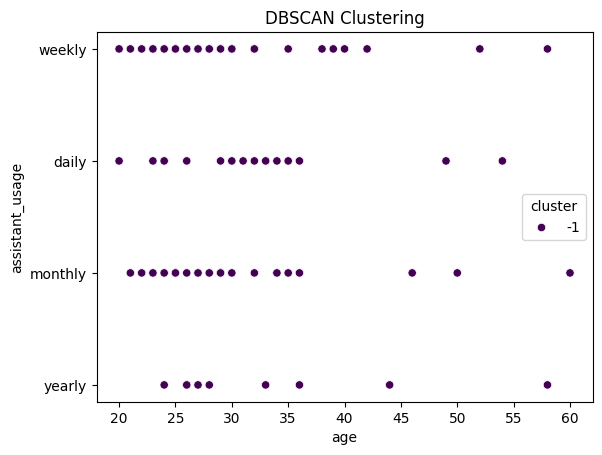

In [75]:
# Anzahl der Cluster anzeigen
print("Anzahl der Cluster:", len(set(user_information['cluster'])) - (1 if -1 in user_information['cluster'] else 0))
print(user_information['cluster'].value_counts())

# Ergebnisse visualisieren (z.B. nach den ersten beiden numerischen Features)
sns.scatterplot(x=user_information['age'], y=user_information['assistant_usage'], hue=user_information['cluster'], palette="viridis")
plt.title("DBSCAN Clustering")
plt.show()







Anzahl der Cluster: 1
cluster
-1    83
Name: count, dtype: int64


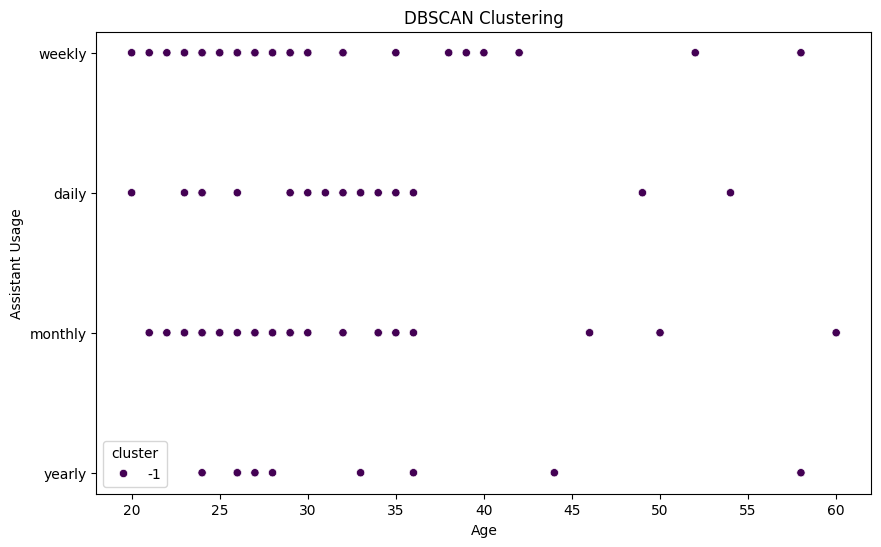

In [76]:
# Importiere notwendige Bibliotheken
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
user_information = pd.read_csv('user_information.csv')

# Vorverarbeitung der Daten

# Selektieren der relevanten Spalten
features = ['age', 'gender', 'education', 'assistant_usage', 'experience_analysis_tools', 
            'Trust 1', 'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']

# Trennen der numerischen und kategorialen Merkmale
numerical_features = ['age', 'experience_analysis_tools', 'Trust 1', 
                      'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']
categorical_features = ['gender', 'education', 'assistant_usage']

# Pipeline zur Vorverarbeitung erstellen
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# DBSCAN-Modell erstellen und Pipeline aufsetzen
dbscan_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', DBSCAN(eps=0.2, min_samples=50))
])

# Modell anwenden
user_information['cluster'] = dbscan_pipeline.fit_predict(user_information[features])

# Ergebnisse analysieren
# Anzahl der Cluster anzeigen
num_clusters = len(set(user_information['cluster'])) - (1 if -1 in user_information['cluster'] else 0)
print("Anzahl der Cluster:", num_clusters)

# Clusterverteilung anzeigen
cluster_counts = user_information['cluster'].value_counts()
print(cluster_counts)

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_information['age'], y=user_information['assistant_usage'], hue=user_information['cluster'], palette="viridis")
plt.title("DBSCAN Clustering")
plt.xlabel('Age')
plt.ylabel('Assistant Usage')
plt.show()

# K-means Clustering

# Import relevanter Klassen / Module / Bibliotheken

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


## Umwandlung der Daten

In [78]:

# Daten einlesen
df = pd.read_csv('user_information.csv')

# Umwandlung kategorischer Variablen in numerische Werte
label_encoder = LabelEncoder()

# Gender umwandeln
df['gender'] = label_encoder.fit_transform(df['gender'])

# Education umwandeln
education_mapping = {'middle_school': 0, 'abitur': 1, 'bachelor': 2, 'master': 3, 'phd': 4}
df['education'] = df['education'].map(education_mapping)

# Assistant usage umwandeln
usage_mapping = {'yearly': 0, 'monthly': 1, 'weekly': 2, 'daily': 3}
df['assistant_usage'] = df['assistant_usage'].map(usage_mapping)

# Auswahl der Features
features = ['age', 'gender', 'education', 'assistant_usage', 'experience_analysis_tools',
            'Trust 1', 'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']

X = df[features]

# Überprüfung auf fehlende Werte
if X.isnull().sum().sum() > 0:
    print("Es gibt fehlende Werte in den Daten. Diese werden mit dem Mittelwert aufgefüllt.")
    X = X.fillna(X.mean())

# Standardisierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Es gibt fehlende Werte in den Daten. Diese werden mit dem Mittelwert aufgefüllt.


# Bestimmen der optimalen Anzahl von Clustern
# 1. Silhouette-Score

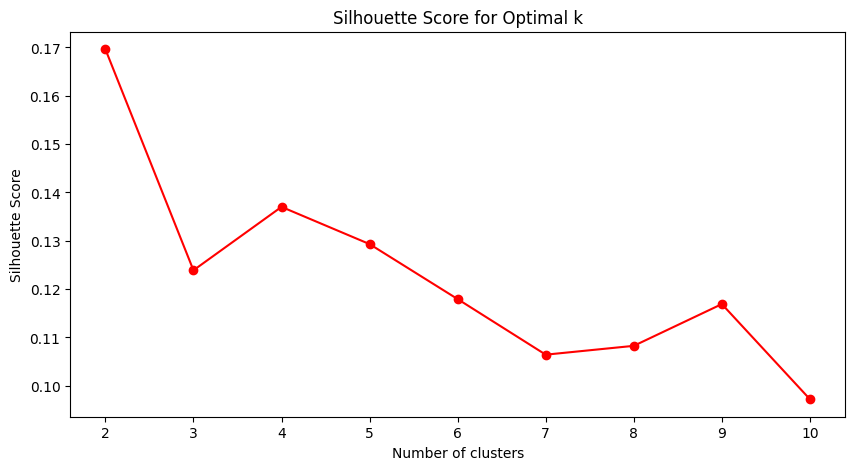

In [79]:

# Bestimmen der optimalen Anzahl von Clustern (Elbow-Methode und Silhouette-Score)
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Silhouette-Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Der Silhouette-Score misst, wie ähnlich ein Objekt zu seiner eigenen Clustergruppe im Vergleich zu anderen Clustergruppen ist. Ein höherer Silhouette-Score deutet auf eine bessere Trennung zwischen den Clustern hin. Wir wählen die Anzahl der Cluster bei denen der Silhouetten Score optimiert wird: In diesem Fall k=2 

# 2. Elbow-Method

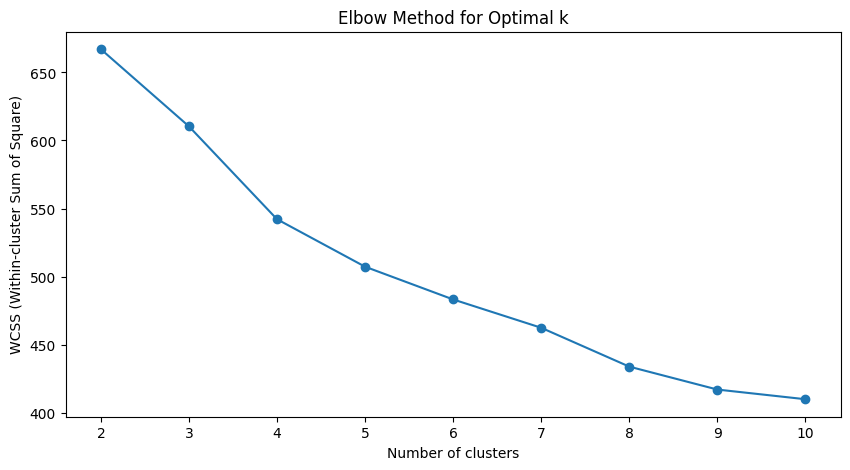

In [80]:

# Elbow-Methode
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Square)')
plt.show()



Elbow-Methode sucht nach einem "Knickpunkt" in der Grafik der Summe der quadratischen Abstände innerhalb der Cluster (WCSS) gegen die Anzahl der Cluster. Der Punkt, an dem die Reduktion der WCSS signifikant abnimmt, wird als optimale Anzahl von Clustern angesehen.
Hier gibt es keinen klaren "Knickpunkt". Der WCSS-Wert sinkt stetig, aber es gibt keine deutliche Stelle, an der die Abnahme deutlich geringer wird.

# Analyse und Visualisierung
Verwendung von PCA zur Reduktion auf 2 Dimensionen zur Visualisierung

        age    gender  education  assistant_usage  experience_analysis_tools  \
0 -0.030532 -0.077176  -0.072926         0.184926                  -0.087332   
1  0.457159  0.390634   0.560230         0.113610                   0.493738   

    Trust 1   Trust 2   Trust 3  Satisfaction  Anthropomorphism  
0  0.504015  0.445576  0.508566      0.441393          0.199832  
1  0.086919 -0.032436  0.069336      0.169019         -0.160893  


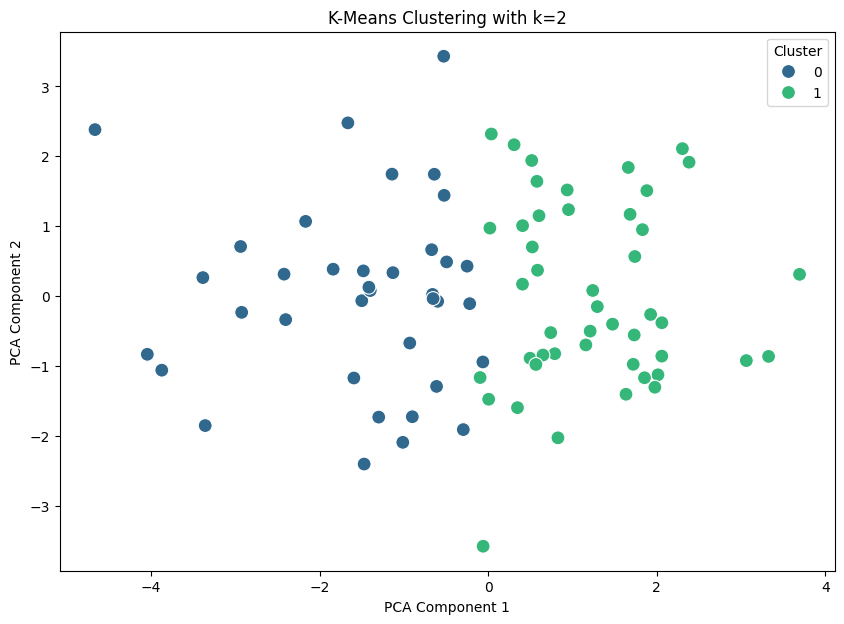

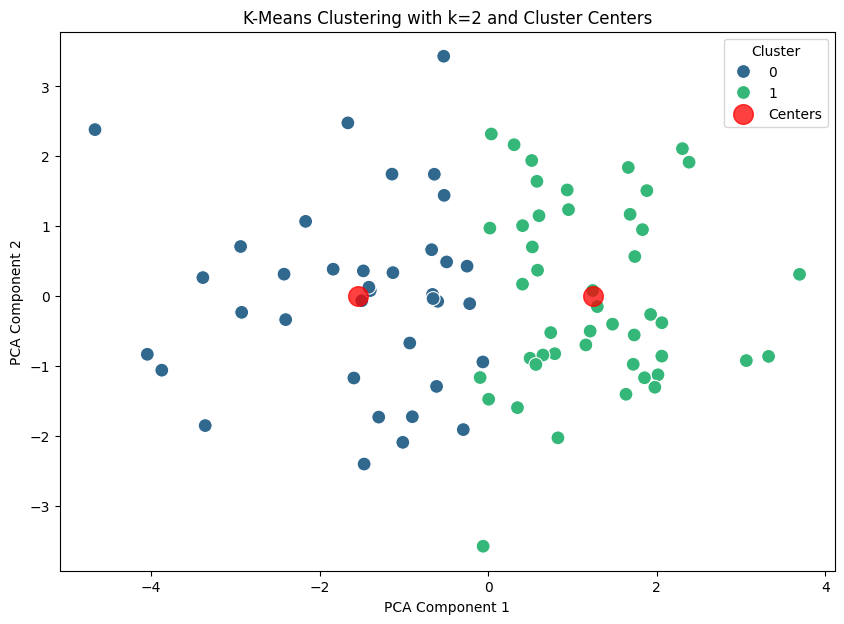

In [81]:


# K-Means Clustering mit der optimalen Anzahl von Clustern
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Da range(2, 11) bei 2 beginnt
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Verwendung von PCA zur Reduktion auf 2 Dimensionen für Visualisierung
from sklearn.decomposition import PCA

features = ['age', 'gender', 'education', 'assistant_usage', 'experience_analysis_tools',
            'Trust 1', 'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Überprüfen der PCA-Ladungen (Loadings)
X_pca = pca.fit_transform(X_scaled)


pca_loadings = pd.DataFrame(pca.components_, columns=features)  # Die Spaltennamen sind die Merkmale
print(pca_loadings)

df['pca_1'] = pca_components[:, 0]
df['pca_2'] = pca_components[:, 1]

# Visualisierung der Cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', palette='viridis', data=df, s=100)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Cluster-Zentren visualisieren
plt.figure(figsize=(10, 7))
centers = pca.transform(kmeans.cluster_centers_)
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', palette='viridis', data=df, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title(f'K-Means Clustering with k={optimal_k} and Cluster Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## Beschreibung des Ergebnisses:



# Spectral Clustering

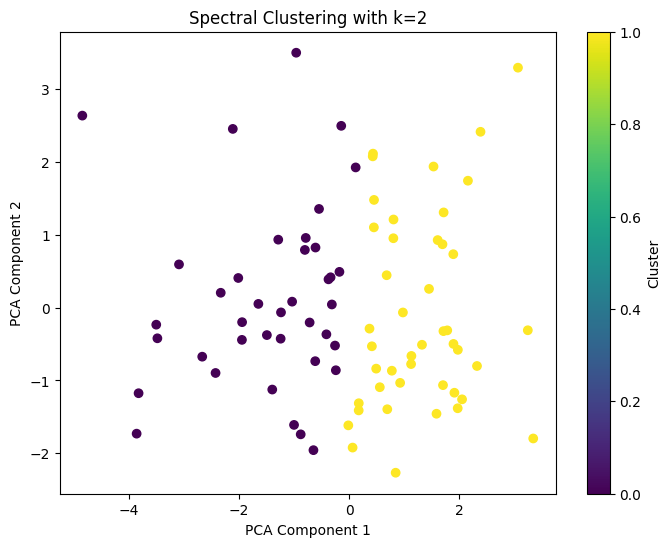

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Daten einlesen
user_information = pd.read_csv('user_information.csv')

# Kategorische Daten kodieren
label_encoders = {}
for column in ['gender', 'education', 'assistant_usage']:
    le = LabelEncoder()
    user_information[column] = le.fit_transform(user_information[column])
    label_encoders[column] = le

# Features skalieren
X = user_information.drop('id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spectral Clustering anwenden
k = 2  # Anzahl der Cluster
spectral_clustering = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')
user_information['cluster'] = spectral_clustering.fit_predict(X_scaled)



# PCA für die Visualisierung anwenden
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot der Cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=user_information['cluster'], cmap='viridis')
plt.title(f'Spectral Clustering with k={k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [83]:

# Überprüfen der PCA-Ladungen (Loadings)
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns)


# Durchschnittswerte der Merkmale in den Clustern berechnen
cluster_means = user_information.groupby('cluster').mean()



# Ergebnis anzeigen
pca_loadings


,age,gender,education,assistant_usage,experience_analysis_tools,Trust 1,Trust 2,Trust 3,Satisfaction,Anthropomorphism
0,-0.057227,-0.084952,-0.166098,-0.123123,-0.107279,0.498154,0.451181,0.504216,0.43212,0.206323
1,0.586455,0.266471,0.552967,0.022527,0.353957,0.132861,0.060451,0.129449,0.20052,-0.274273


Unsere PCA Loadings geben an, welche User Merkmale zu welchem Grad in unser Modell einfließen. Ein hohes positives oder negatives Gewicht (Ladung) eines Merkmals in einer Komponente zeigt, dass das Merkmal stark zur entsprechenden Komponente beiträgt.

In unser PCA Loading 0 fließt Trust 1,2,3 und Satisfaction signifikant (hier definiert ±0.3) ein.

In unser PCA Loading 1 fließt Age, Education und Experience Analysis Tools signifikant ein. 

Gender, Assistant Usage und Anthropomorphism spielen hierbei keine große Rolle.


In [84]:

user_information.head()
cluster_means


,id,age,gender,education,assistant_usage,experience_analysis_tools,Trust 1,Trust 2,Trust 3,Satisfaction,Anthropomorphism
cluster,,,,,,,,,,,
0,180.282051,32.205128,1.461538,2.615385,1.538462,4.538462,3.358974,2.846154,2.564103,3.512821,1.179487
1,178.613636,29.772727,1.409091,2.000000,1.295455,3.795455,5.386364,4.818182,4.659091,5.181818,2.000000


In [85]:
# Angenommen, 'cluster_means' enthält die berechneten Durchschnittswerte
# Runden der Durchschnittswerte auf die nächste ganze Zahl
rounded_means = cluster_means.copy()
for column in label_encoders.keys():
    rounded_means[column] = rounded_means[column].round().astype(int)

# Umwandlung der gerundeten Werte in die ursprünglichen Kategorienamen
for column, le in label_encoders.items():
    rounded_means[column] = le.inverse_transform(rounded_means[column])

# Anzeigen der umgewandelten und gerundeten Durchschnittswerte
rounded_means

,id,age,gender,education,assistant_usage,experience_analysis_tools,Trust 1,Trust 2,Trust 3,Satisfaction,Anthropomorphism
cluster,,,,,,,,,,,
0,180.282051,32.205128,female,master,weekly,4.538462,3.358974,2.846154,2.564103,3.512821,1.179487
1,178.613636,29.772727,female,bachelor,monthly,3.795455,5.386364,4.818182,4.659091,5.181818,2.000000


Es lassen sich zwei Cluster darstellen mit zwei Personas: 
1. Persona benutzt wöchentlich einen Assistenten, hat eine große Erfahrung mit Analysis Tools, aber relativ wenig Vertrauen und Zufriedenheit.
2. Persona benutzt monatlich einen Assistenten, hat weniger Erfahrung mit Analysis Tools aber mehr Vertrauen und Zufriedenheit. 

In [86]:
# Tabelle mit User IDs und Cluster-Zuordnungen erstellen
user_clusters = user_information[['id', 'cluster']]

# Ausgabe der Tabelle
user_clusters.head()  # Zeigt die ersten Zeilen der Tabelle

user_clusters.to_csv('user_clusters.csv', index=False)
user_clusters

user_clusters.to_csv('user_clusters.csv', index=False)



# Kann unser Clustering verbessert werden, wenn wir einzelne Features ausschließen?

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Daten einlesen
user_information = pd.read_csv('user_information.csv')

# Kategorische Daten kodieren
label_encoders = {}
for column in ['gender', 'education', 'assistant_usage']:
    le = LabelEncoder()
    user_information[column] = le.fit_transform(user_information[column])
    label_encoders[column] = le

# Liste der Features, die wir testen möchten
features = ['age', 'gender', 'education', 'assistant_usage', 'experience_analysis_tools', 
            'Trust 1', 'Trust 2', 'Trust 3', 'Satisfaction', 'Anthropomorphism']

# Ergebnisspeicher
results = []

# For-Schleife über alle Features, um sie nacheinander auszuschließen
for feature in features:
    print(f"Testing without feature: {feature}")
    
    # Erstellen der Feature-Liste ohne das aktuelle Feature
    selected_features = [f for f in features if f != feature]
    
    # Features skalieren
    X = user_information[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Spectral Clustering anwenden
    k = 2  # Anzahl der Cluster (dies kann angepasst werden)
    spectral_clustering = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')
    clusters = spectral_clustering.fit_predict(X_scaled)
    
    # Berechnung des Silhouette-Scores als Maß für die Cluster-Qualität
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg}")
    
    # Speichern der Ergebnisse
    results.append({
        'excluded_feature': feature,
        'silhouette_score': silhouette_avg
    })

# Umwandlung der Ergebnisse in einen DataFrame zur besseren Übersicht
results_df = pd.DataFrame(results)
results_df.sort_values(by='silhouette_score', ascending=False)


Testing without feature: age
Silhouette Score: 0.17733663609178227
Testing without feature: gender
Silhouette Score: 0.17893544973720138
Testing without feature: education
Silhouette Score: 0.17892123651475458
Testing without feature: assistant_usage
Silhouette Score: 0.18256905870957063
Testing without feature: experience_analysis_tools
Silhouette Score: 0.18240144761151475
Testing without feature: Trust 1
Silhouette Score: 0.15519823967344165
Testing without feature: Trust 2
Silhouette Score: 0.1623904481795604
Testing without feature: Trust 3
Silhouette Score: 0.1202910315430546
Testing without feature: Satisfaction
Silhouette Score: 0.1629878655232969
Testing without feature: Anthropomorphism
Silhouette Score: 0.17120466768266468


,excluded_feature,silhouette_score
3,assistant_usage,0.182569
4,experience_analysis_tools,0.182401
1,gender,0.178935
2,education,0.178921
0,age,0.177337
9,Anthropomorphism,0.171205
8,Satisfaction,0.162988
6,Trust 2,0.162390
5,Trust 1,0.155198
7,Trust 3,0.120291


->  Nein, Silhouette Score verändert sich nicht merklich